#### Import modules and read data

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
xlsx = pd.read_excel(os.getcwd() + '/Data/covid-19-raw-data-4-20-2021.xlsx', sheet_name = ['CasesByDate (Test Date)', 'DateofDeath', 'Hospitalization from Hospitals', 'TestingByDate (Test Date)'], engine = 'openpyxl')

In [3]:
cases, deaths, hosptl, tests = xlsx['CasesByDate (Test Date)'], xlsx['DateofDeath'], xlsx['Hospitalization from Hospitals'], xlsx['TestingByDate (Test Date)'].dropna(how = 'all')
cases.shape, deaths.shape, hosptl.shape, tests.shape

((447, 4), (405, 6), (381, 9), (454, 25))

In [4]:
cases.head()

,Date,Positive Total,Positive New,7-day confirmed case average
0,2020-01-29,1,1,NaN
1,2020-01-30,1,0,NaN
2,2020-01-31,1,0,NaN
3,2020-02-01,1,0,NaN
4,2020-02-02,1,0,NaN


In [5]:
deaths.head()

,Date of Death,Confirmed Deaths,Confirmed Total,Probable Deaths,Probable Total,7-day confirmed death average
0,2020-03-10,0,0,0,0,NaN
1,2020-03-11,0,0,0,0,NaN
2,2020-03-12,0,0,0,0,NaN
3,2020-03-13,0,0,0,0,NaN
4,2020-03-14,0,0,0,0,NaN


In [6]:
hosptl.head()

,Date,Total number of COVID patients in hospital today,Net new number of COVID patients in hospital today,7 day average of COVID hospitalizations,ICU,Net New number ICU,Intubated,Net New number intubated,New COVID-19 hospitalizations
0,2020-04-04,1370,NaN,NaN,438,242,NaN,NaN,NaN
1,2020-04-05,1632,262.0,NaN,526,88,NaN,NaN,NaN
2,2020-04-06,1677,45.0,NaN,542,16,NaN,NaN,NaN
3,2020-04-07,1831,154.0,NaN,575,33,NaN,NaN,NaN
4,2020-04-08,2119,288.0,NaN,659,84,NaN,NaN,NaN


In [7]:
tests.head()

,Date,Molecular Total,Molecular New,Molecular Positive New,Antigen Positive New,Antigen New,Antigen Total,All Antigen Tests,All Positive Antigen Tests,First Molecular Test per person,...,All Molecular Tests_MA without Higher ED,All Positive Molecular Tests_MA without Higher ED,7-day weighted average positive test rate all molecular tests in MA,7-day weighted average positive test rate all molecular tests_Higher Ed ONLY,7-day weighted average positive test rate all molecular tests_MA without Higher ED,7-day average All Molecular Tests,7-day average daily molecular tests_MA without Higher ED,7-day average daily molecular tests_Higher ED ONLY,7-day average daily POSITIVE molecular tests_MA without Higher ED,7-day average daily POSITIVE molecular tests_Higher ED ONLY
0,2020-01-22,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,2.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Total cases over time

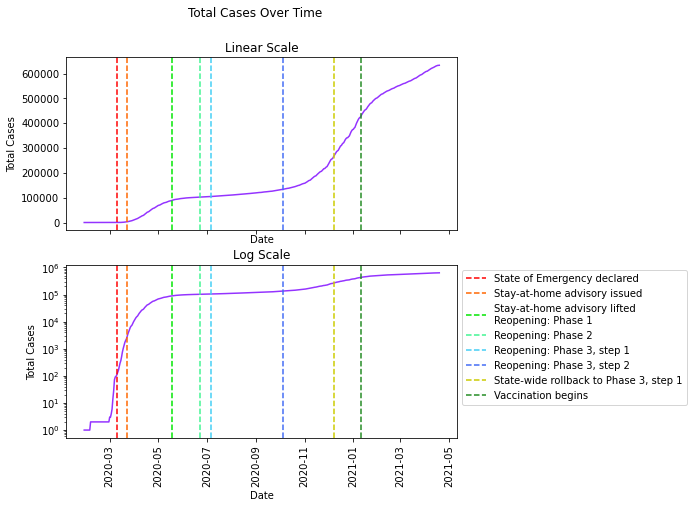

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (7, 7))
fig.suptitle('Total Cases Over Time')
# fig.subplots_adjust(hspace = 0.7)

ax1.plot(cases['Date'], cases['Positive Total'], color = '#9433ff')
ax1.axvline(pd.to_datetime('2020-03-10'), ls = '--', color = '#ff0000')
ax1.axvline(pd.to_datetime('2020-03-23'), ls = '--', color = '#ff6600')
ax1.axvline(pd.to_datetime('2020-05-18'), ls = '--', color = '#00e600')
ax1.axvline(pd.to_datetime('2020-06-22'), ls = '--', color = '#42f593')
ax1.axvline(pd.to_datetime('2020-07-06'), ls = '--', color = '#42cef5')
ax1.axvline(pd.to_datetime('2020-10-05'), ls = '--', color = '#426cf5')
ax1.axvline(pd.to_datetime('2020-12-08'), ls = '--', color = '#cccc00')
ax1.axvline(pd.to_datetime('2021-01-11'), ls = '--', color = '#228b22')
ax1.set_title('Linear Scale')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases')

ax2.plot(cases['Date'], cases['Positive Total'], color = '#9433ff')
ax2.axvline(pd.to_datetime('2020-03-10'), ls = '--', color = '#ff0000', label = 'State of Emergency declared')
ax2.axvline(pd.to_datetime('2020-03-23'), ls = '--', color = '#ff6600', label = 'Stay-at-home advisory issued')
ax2.axvline(pd.to_datetime('2020-05-18'), ls = '--', color = '#00e600', label = 'Stay-at-home advisory lifted\nReopening: Phase 1')
ax2.axvline(pd.to_datetime('2020-06-22'), ls = '--', color = '#42f593', label = 'Reopening: Phase 2')
ax2.axvline(pd.to_datetime('2020-07-06'), ls = '--', color = '#42cef5', label = 'Reopening: Phase 3, step 1')
ax2.axvline(pd.to_datetime('2020-10-05'), ls = '--', color = '#426cf5', label = 'Reopening: Phase 3, step 2')
ax2.axvline(pd.to_datetime('2020-12-08'), ls = '--', color = '#cccc00', label = 'State-wide rollback to Phase 3, step 1')
ax2.axvline(pd.to_datetime('2021-01-11'), ls = '--', color = '#228b22', label = 'Vaccination begins')
ax2.set_yscale('log')
ax2.set_title('Log Scale')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Cases')

plt.xticks(rotation = 90)
plt.legend(loc = 2, bbox_to_anchor = (1, 1))
plt.show()
plt.close()

#### New positive cases

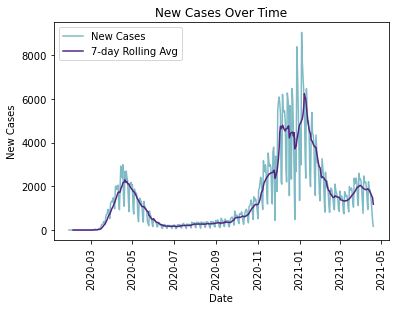

In [9]:
plt.plot(cases['Date'], cases['Positive New'], alpha = 0.5, color = '#00788c', label = 'New Cases')
plt.plot(cases['Date'], cases['Positive New'].rolling(7).mean(), color = '#552583', label = '7-day Rolling Avg')
plt.title('New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()

In [10]:
# plt.plot(cases['Date'].tail(60), cases['Positive New'].tail(60), alpha = 0.5, color = '#00788c', label = 'New Cases')
# plt.plot(cases['Date'].tail(60), cases['Positive New'].rolling(7).mean().tail(60), color = '#552583', label = '7-day Rolling Avg')
# plt.title('New Cases Over Time - Last 60 Days')
# plt.xlabel('Date')
# plt.ylabel('New Cases')
# plt.xticks(rotation = 90)
# plt.legend()
# plt.show()
# plt.close()

In [11]:
# # plt.plot(cases['Date'].tail(60), (cases['Positive New'].pct_change() * 100).tail(60), alpha = 0.5, color = '#00788c', label = 'Pct. Change')
# plt.plot(cases['Date'].tail(60), (cases['Positive New'].pct_change() * 100).rolling(7).mean().tail(60), color = '#552583', label = '7-day Rolling Avg')
# plt.title('New Cases Over Time - Percent Change in the Last 60 Days')
# plt.xlabel('Date')
# plt.ylabel('Percent Change')
# plt.xticks(rotation = 90)
# # plt.legend()
# plt.show()
# plt.close()

#### Case Rate and Testing

In [12]:
higher_ed_tests = tests[['Date', 'All Positive Molecular Tests_Higher Ed ONLY', 'All Molecular Tests_Higher Ed ONLY']].dropna()

higher_ed_tests.head()

,Date,All Positive Molecular Tests_Higher Ed ONLY,All Molecular Tests_Higher Ed ONLY
206,2020-08-15,3.0,1615.0
207,2020-08-16,7.0,1922.0
208,2020-08-17,11.0,11712.0
209,2020-08-18,4.0,12295.0
210,2020-08-19,11.0,12400.0


In [13]:
ex_higher_ed_tests = tests[['Date', 'All Positive Molecular Tests_MA without Higher ED', 'All Molecular Tests_MA without Higher ED']].dropna()

ex_higher_ed_tests.head()

,Date,All Positive Molecular Tests_MA without Higher ED,All Molecular Tests_MA without Higher ED
206,2020-08-15,183.0,12870.0
207,2020-08-16,136.0,9682.0
208,2020-08-17,464.0,28989.0
209,2020-08-18,452.0,27273.0
210,2020-08-19,396.0,26228.0


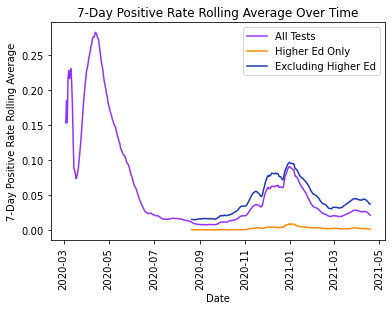

In [14]:
# plt.plot(tests['Date'], tests['All Positive Molecular Tests'] / tests['All Molecular Tests'], alpha = 0.5, color = '#00788c')
plt.plot(tests['Date'], (tests['All Positive Molecular Tests'] / tests['All Molecular Tests']).rolling(7).mean(), color = '#9433ff', label ='All Tests')
plt.plot(higher_ed_tests['Date'], (higher_ed_tests['All Positive Molecular Tests_Higher Ed ONLY'] / higher_ed_tests['All Molecular Tests_Higher Ed ONLY']).rolling(7).mean(), color = '#ff8b00', label = 'Higher Ed Only')
plt.plot(higher_ed_tests['Date'], (ex_higher_ed_tests['All Positive Molecular Tests_MA without Higher ED'] / ex_higher_ed_tests['All Molecular Tests_MA without Higher ED']).rolling(7).mean(), color = '#1c39bb', label = 'Excluding Higher Ed')
plt.title('7-Day Positive Rate Rolling Average Over Time')
plt.xlabel('Date')
plt.ylabel('7-Day Positive Rate Rolling Average')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()

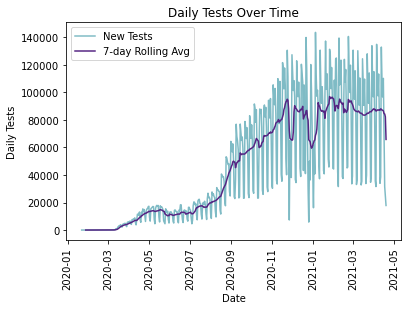

In [15]:
plt.plot(tests['Date'], tests['All Molecular Tests'], alpha = 0.5, color = '#00788c', label = 'New Tests')
plt.plot(tests['Date'], (tests['All Molecular Tests']).rolling(7).mean(), color = '#552583', label = '7-day Rolling Avg')
plt.title('Daily Tests Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Tests')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()